In [5]:
2 ** 100

1267650600228229401496703205376

In [6]:
import time

In [15]:
지역 = input("어디 사는 가요? ")
print("{}에 살고 계시는 군요.".format(지역))

어디 사는 가요? seoul
seoul에 살고 계시는 군요.


In [9]:
print("hello")
time.sleep(5)  # 5초 딜레이
print("world")

hello
world


# Pandas 맛보기

In [17]:
import pandas as pd

pd.__version__

'0.23.4'

In [24]:
df_list = pd.read_html('https://finance.naver.com/marketindex/exchangeList.nhn')
df = df_list[0]
df.columns = [
    '통화명', '매매기준율', '현찰 - 사실 때', '현찰 - 파실 때',
    '송금 - 보내실 때', '송금 - 받으실 때', '미화환산율',
]
df = df.set_index('통화명')
print(df.shape)
df.head()  # 상위 5행만 보기

(44, 6)


,매매기준율,현찰 - 사실 때,현찰 - 파실 때,송금 - 보내실 때,송금 - 받으실 때,미화환산율
통화명,,,,,,
미국 USD,1142.90,1162.90,1122.90,1154.10,1131.70,1.000
유럽연합 EUR,1283.42,1308.96,1257.88,1296.25,1270.59,1.123
일본 JPY (100엔),1026.26,1044.21,1008.31,1036.31,1016.21,0.898
중국 CNY,169.94,178.43,161.45,171.63,168.25,0.149
홍콩 HKD,145.60,148.46,142.74,147.05,144.15,0.127


In [25]:
df.to_excel("환율.xlsx")

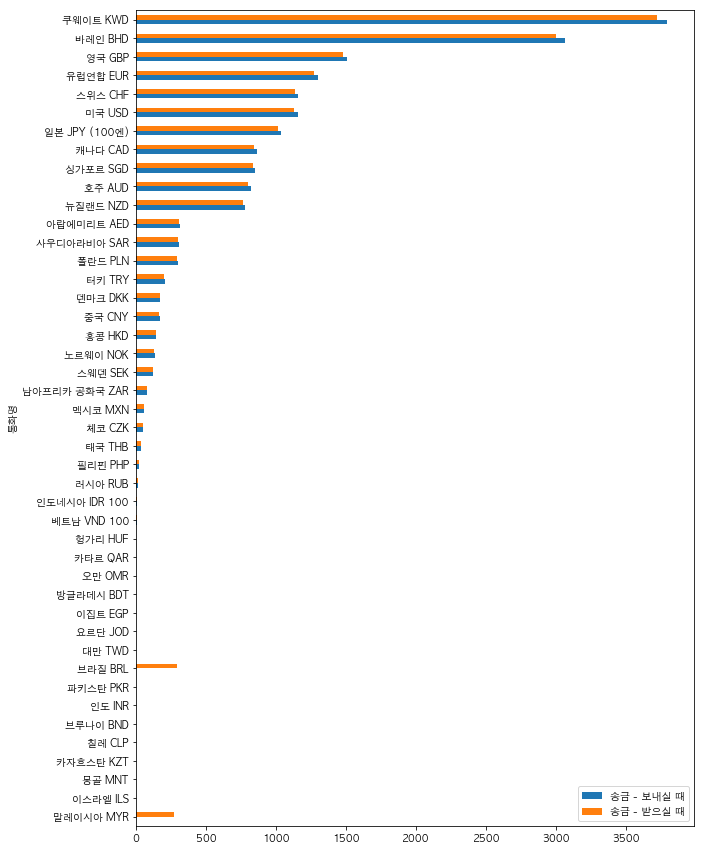

In [34]:
%matplotlib inline
from matplotlib import rc
from matplotlib import pyplot as plt

plt.rcParams['axes.unicode_minus'] = False

rc('font', family='Malgun Gothic') # Windows 일 경우
# rc('font', family='AppleGothic') # Mac 일 경우

df2 = df.sort_values('송금 - 보내실 때', ascending=True)

names = ['송금 - 보내실 때', '송금 - 받으실 때']
df2[names].plot(kind='barh', figsize=(10, 15))